In [1]:
# Implement the Cleaning class in Home-Credit-Prediction/homecredit/cleaner.py

In [2]:

import os
import sys
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path_dir = (os.path.dirname(os.getcwd()))
sys.path.append(path_dir)
    
from homecredit.data import HomeCredit

from homecredit.preparation import Preparation

In [8]:
#data = HomeCredit().get_data()['train']
#data.head(2)

In [5]:

class Cleaning:
    
    def __init__(self):
        # Assign an attribute ".data" to all new instances of Preparation
        self.data = HomeCredit().get_data()['train'].copy() # good practice to be sure not to modify your `data` variable
        
    def get_count_missing_values(self):
        missing_df = pd.DataFrame(self.data.isnull().sum().sort_values(ascending=False))
        return missing_df
    
    
    def get_percentage_missing_values(self):
        ratio = pd.DataFrame(
            (self.data.isnull().sum().sort_values(ascending=False))/ self.data.shape[0])
        return ratio
    
    
    def missing_values_table(self, na_name=False): # self : dataframe
                                            # if na_names: print the features list  
    
        na_cols = [col for col in self.data.columns if self.data[col].isnull().sum() > 0]

        count = self.data[na_cols].isnull().sum().sort_values(ascending=False)
        ratio = ( self.data[na_cols].isnull().sum() / self.data.shape[0] * 100 ).sort_values(ascending=False)
        missing_df = pd.concat([count, np.round(ratio, 2)], axis=1, keys=['Number of missing values', 'Percent'])

        f,ax =plt.subplots(figsize=(19, 10))
        plt.xticks(rotation='90')
        fig=sns.barplot(missing_df.index, missing_df["Percent"])
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15);

        return na_cols if na_name else missing_df # na_cols : list, missing_df : dataframe




In [6]:
cl = Cleaning()

In [10]:
cl.data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
cl.get_count_missing_values()

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
...,...
NAME_HOUSING_TYPE,0
NAME_FAMILY_STATUS,0
NAME_EDUCATION_TYPE,0
NAME_INCOME_TYPE,0


In [12]:
cl.get_percentage_missing_values()

,0
COMMONAREA_MEDI,0.698723
COMMONAREA_AVG,0.698723
COMMONAREA_MODE,0.698723
NONLIVINGAPARTMENTS_MODE,0.694330
NONLIVINGAPARTMENTS_AVG,0.694330
...,...
NAME_HOUSING_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_INCOME_TYPE,0.000000


/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Number of missing values,Percent
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
...,...,...
EXT_SOURCE_2,660,0.21
AMT_GOODS_PRICE,278,0.09
AMT_ANNUITY,12,0.00
CNT_FAM_MEMBERS,2,0.00


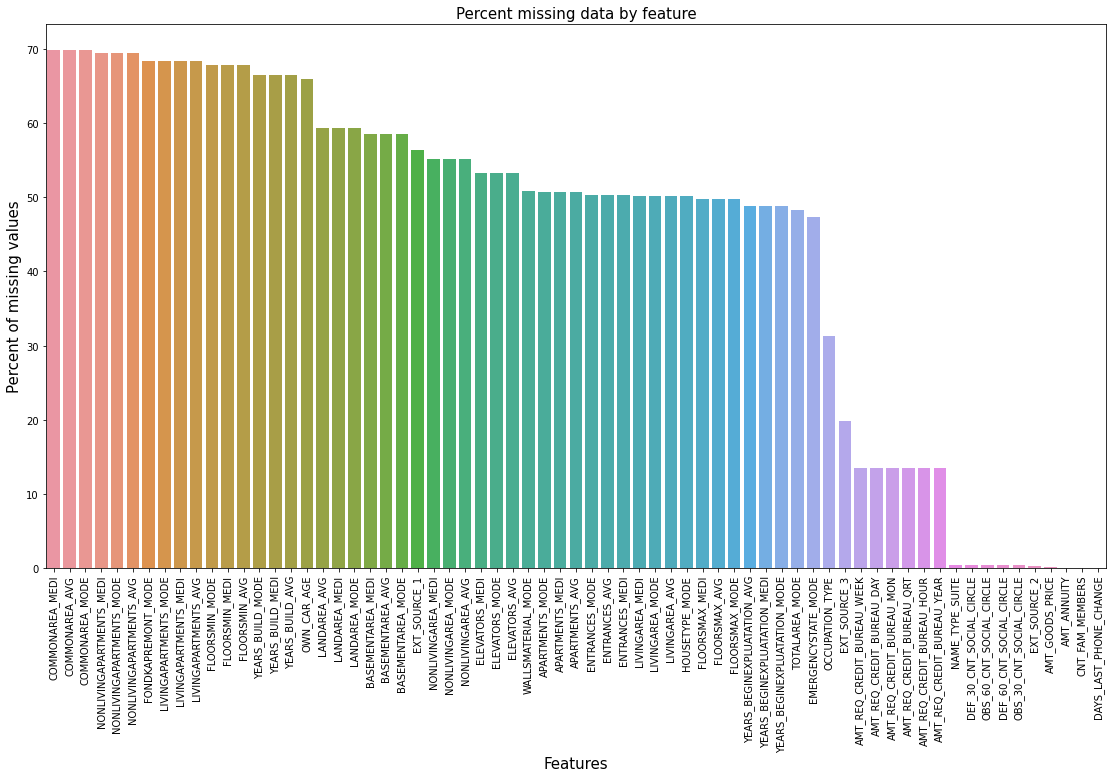

In [13]:
cl.missing_values_table()